##  Chargement des bibliothèques et des données


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import classification_report, confusion_matrix, silhouette_score


df = pd.read_csv("hotel_reviews.csv") 

## Visualisation rapide


In [3]:
display(df.columns)

Index(['Identifiant Avis', 'Note Globale', 'Nombre de Mots',
       'Mots-Clés Positifs', 'Mots-Clés Négatifs', 'Type de Séjour',
       'Durée Séjour (nuits)', 'Mode de Réservation', 'Nationalité',
       'Fréquence Séjours'],
      dtype='object')

In [4]:
display(df.head())

,Identifiant Avis,Note Globale,Nombre de Mots,Mots-Clés Positifs,Mots-Clés Négatifs,Type de Séjour,Durée Séjour (nuits),Mode de Réservation,Nationalité,Fréquence Séjours
0,a484d474,3.4,59,Oui,Non,Solo,3,Agence,Espagnol,6
1,0d418bb9,3.1,53,Oui,Non,Solo,5,Agence,Espagnol,11
2,1f383c54,2.6,44,Oui,Oui,Événement,3,Agence,Espagnol,12
3,f8a8f855,3.5,96,Oui,Non,Tourisme,13,En ligne,Espagnol,13
4,5bf64943,3.3,18,Oui,Oui,Affaires,3,En ligne,Français,5


In [5]:
display(df.describe())

,Note Globale,Nombre de Mots,Durée Séjour (nuits),Fréquence Séjours
count,300.000000,300.000000,300.000000,300.000000
mean,3.551000,84.490000,5.716667,5.616667
std,0.696983,43.766443,3.597155,4.183467
min,2.100000,10.000000,1.000000,0.000000
25%,3.000000,50.750000,3.000000,2.000000
50%,3.600000,76.000000,5.000000,5.000000
75%,4.100000,118.000000,8.000000,8.000000
max,5.000000,200.000000,15.000000,15.000000


In [6]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Identifiant Avis      300 non-null    object 
 1   Note Globale          300 non-null    float64
 2   Nombre de Mots        300 non-null    int64  
 3   Mots-Clés Positifs    300 non-null    object 
 4   Mots-Clés Négatifs    300 non-null    object 
 5   Type de Séjour        300 non-null    object 
 6   Durée Séjour (nuits)  300 non-null    int64  
 7   Mode de Réservation   300 non-null    object 
 8   Nationalité           300 non-null    object 
 9   Fréquence Séjours     300 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 23.6+ KB


None

## Nettoyage des données


In [7]:
print(df.columns)  # Vérifie la liste des colonnes


Index(['Identifiant Avis', 'Note Globale', 'Nombre de Mots',
       'Mots-Clés Positifs', 'Mots-Clés Négatifs', 'Type de Séjour',
       'Durée Séjour (nuits)', 'Mode de Réservation', 'Nationalité',
       'Fréquence Séjours'],
      dtype='object')


In [8]:
data = df.drop(columns=['Identifiant Avis'])

In [9]:
print(data.columns) 

Index(['Note Globale', 'Nombre de Mots', 'Mots-Clés Positifs',
       'Mots-Clés Négatifs', 'Type de Séjour', 'Durée Séjour (nuits)',
       'Mode de Réservation', 'Nationalité', 'Fréquence Séjours'],
      dtype='object')


In [10]:

# Encodage des variables qualitatives
label_encoders = {}
categorical_cols = ['Mots-Clés Positifs', 'Mots-Clés Négatifs','Nombre de Mots', 
                    'Type de Séjour', 'Mode de Réservation', 'Nationalité','Type de Séjour','Durée Séjour (nuits)','Fréquence Séjours']

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Suppression des valeurs manquantes
data.dropna(inplace=True)

# Séparation des variables explicatives et cible (Note globale attribuée)
X = data.drop(columns=['Note Globale'])  # Features
y = data['Note Globale']  # Cible

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Classification supervisée : KNN pour prédire la satisfaction

📌 KNN Classification Report:
               precision    recall  f1-score   support

           2       0.25      0.50      0.33         2
           3       0.59      0.83      0.69        24
           4       0.80      0.52      0.63        31
           5       0.00      0.00      0.00         3

    accuracy                           0.62        60
   macro avg       0.41      0.46      0.41        60
weighted avg       0.66      0.62      0.61        60

📌 KNN Confusion Matrix:
 [[ 1  1  0  0]
 [ 3 20  1  0]
 [ 0 13 16  2]
 [ 0  0  3  0]]


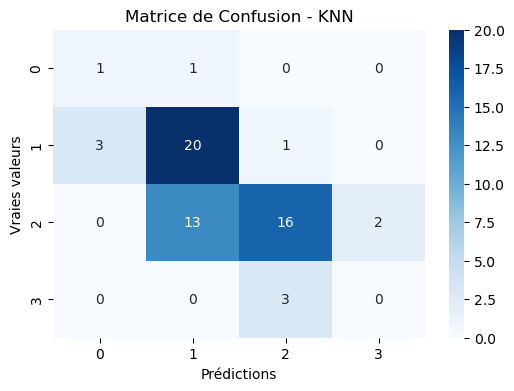

In [11]:
y = data['Note Globale'].round().astype(int)  # Arrondit et convertit en entier


# Séparation des données en train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modèle KNN
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Évaluation du modèle
print("📌 KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("📌 KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

# Affichage de la matrice de confusion
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.title("Matrice de Confusion - KNN")
plt.show()


Résultat attendu : Les facteurs les plus influents sur la satisfaction client.

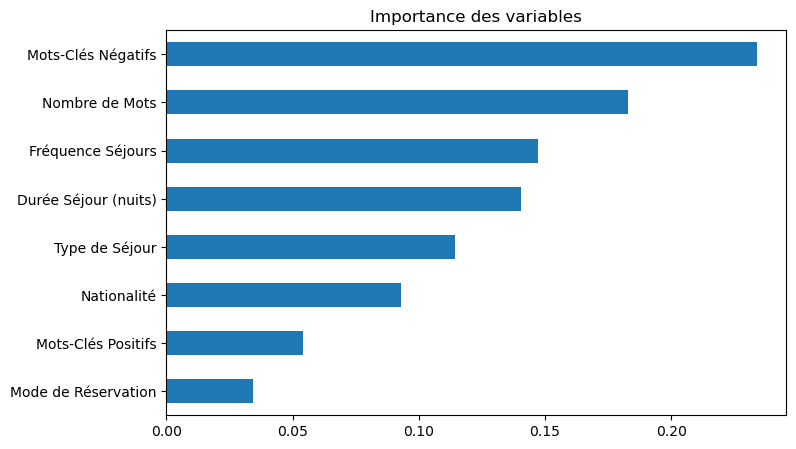

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Modèle Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Importance des features
X_train_df = pd.DataFrame(X_train, columns=X.columns)
importances = pd.Series(rf.feature_importances_, index=X_train_df.columns)


importances.sort_values().plot(kind='barh', figsize=(8,5), title="Importance des variables")
plt.show()


## Clustering non supervisé : Segmentation avec KMeans

In [13]:
print(data.columns)  

Index(['Note Globale', 'Nombre de Mots', 'Mots-Clés Positifs',
       'Mots-Clés Négatifs', 'Type de Séjour', 'Durée Séjour (nuits)',
       'Mode de Réservation', 'Nationalité', 'Fréquence Séjours'],
      dtype='object')


c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


📊 KMeans Silhouette Score: 0.197


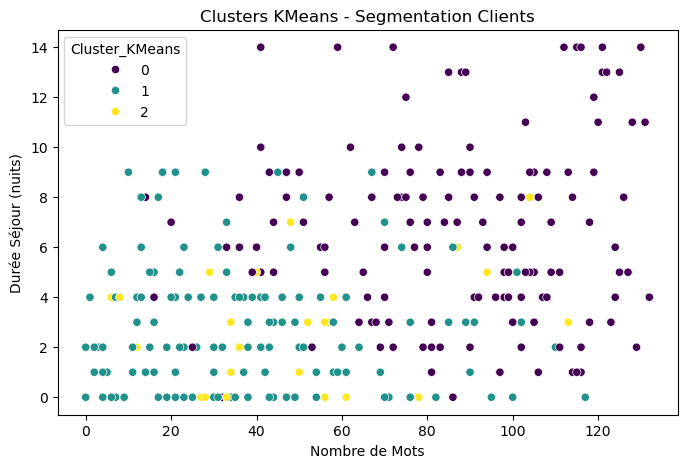

In [14]:
# KMeans avec 3 clusters (ajustable selon l'analyse)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
data['Cluster_KMeans'] = kmeans.fit_predict(X_scaled)

# Score de silhouette pour évaluer la qualité du clustering
silhouette_kmeans = silhouette_score(X_scaled, data['Cluster_KMeans'])
print(f"📊 KMeans Silhouette Score: {silhouette_kmeans:.3f}")

# Visualisation des clusters
plt.figure(figsize=(8,5))
sns.scatterplot(x=data['Nombre de Mots'], y=data['Durée Séjour (nuits)'], hue=data['Cluster_KMeans'], palette='viridis')
plt.title('Clusters KMeans - Segmentation Clients')
plt.show()


Résultat attendu : Identification des profils clients (exemple : clients fidèles, touristes occasionnels, clients affaires).

## Clustering avec DBSCAN pour détecter les groupes atypiques

In [15]:
print(data.columns)

Index(['Note Globale', 'Nombre de Mots', 'Mots-Clés Positifs',
       'Mots-Clés Négatifs', 'Type de Séjour', 'Durée Séjour (nuits)',
       'Mode de Réservation', 'Nationalité', 'Fréquence Séjours',
       'Cluster_KMeans'],
      dtype='object')


DBSCAN Silhouette Score: 0.110


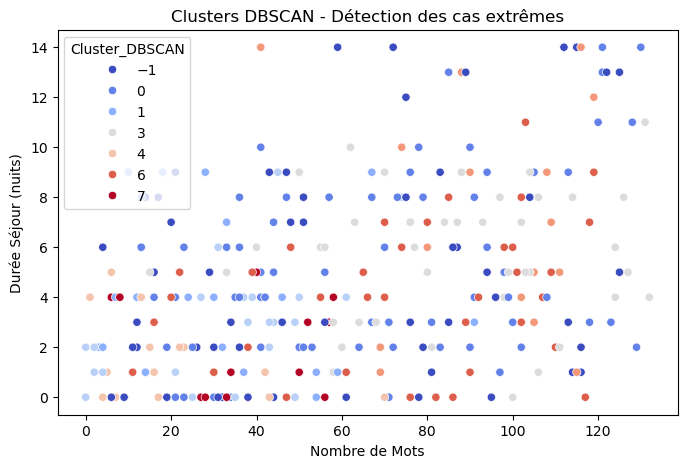

In [16]:
# Modèle DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
data['Cluster_DBSCAN'] = dbscan.fit_predict(X_scaled)

# Score silhouette (si plus d'un cluster)
if len(set(dbscan.labels_)) > 1:
    silhouette_dbscan = silhouette_score(X_scaled, data['Cluster_DBSCAN'])
    print(f"DBSCAN Silhouette Score: {silhouette_dbscan:.3f}")
else:
    silhouette_dbscan = -1
    print("DBSCAN n'a pas trouvé de clusters significatifs.")


plt.figure(figsize=(8,5))
sns.scatterplot(x=data['Nombre de Mots'], y=data['Durée Séjour (nuits)'], hue=data['Cluster_DBSCAN'], palette='coolwarm')
plt.title('Clusters DBSCAN - Détection des cas extrêmes')
plt.show()


Résultat attendu : Identification des clients très insatisfaits ou VIP.

## Analyse et décisions pour la direction

In [17]:
print(data.columns)

Index(['Note Globale', 'Nombre de Mots', 'Mots-Clés Positifs',
       'Mots-Clés Négatifs', 'Type de Séjour', 'Durée Séjour (nuits)',
       'Mode de Réservation', 'Nationalité', 'Fréquence Séjours',
       'Cluster_KMeans', 'Cluster_DBSCAN'],
      dtype='object')


In [18]:
# Statistiques des clusters
cluster_summary = data.groupby('Cluster_KMeans').mean()
print("📌 Analyse des segments clients :\n", cluster_summary)

# Recommandations basées sur les segments
for cluster_id in sorted(data['Cluster_KMeans'].unique()):
    print(f"\n🔎 **Segment {cluster_id}** :")
    segment = data[data['Cluster_KMeans'] == cluster_id]
    avg_rating = segment['Note Globale'].mean()
    
    print(f" - Satisfaction moyenne : {avg_rating:.2f}")
    print(f" - Principales caractéristiques :")
    print(segment.mean(numeric_only=True).sort_values(ascending=False).head(3))

    if avg_rating < 3:
        print("🚨 Recommandation : Identifier les points faibles de ce segment et améliorer les services.")
    elif avg_rating > 4:
        print("✅ Recommandation : Fidéliser ces clients satisfaits avec des offres spéciales.")


📌 Analyse des segments clients :
                 Note Globale  Nombre de Mots  Mots-Clés Positifs  \
Cluster_KMeans                                                     
0                   3.885714       84.619048                 1.0   
1                   3.364341       37.131783                 1.0   
2                   2.504167       50.041667                 0.0   

                Mots-Clés Négatifs  Type de Séjour  Durée Séjour (nuits)  \
Cluster_KMeans                                                             
0                         0.299320        2.884354              6.680272   
1                         0.635659        1.031008              2.821705   
2                         1.000000        1.375000              2.875000   

                Mode de Réservation  Nationalité  Fréquence Séjours  \
Cluster_KMeans                                                        
0                          0.428571     2.476190           5.231293   
1                          0.59

## PCA

📊 Variance expliquée par PC1: 25.30%
📊 Variance expliquée par PC2: 21.72%


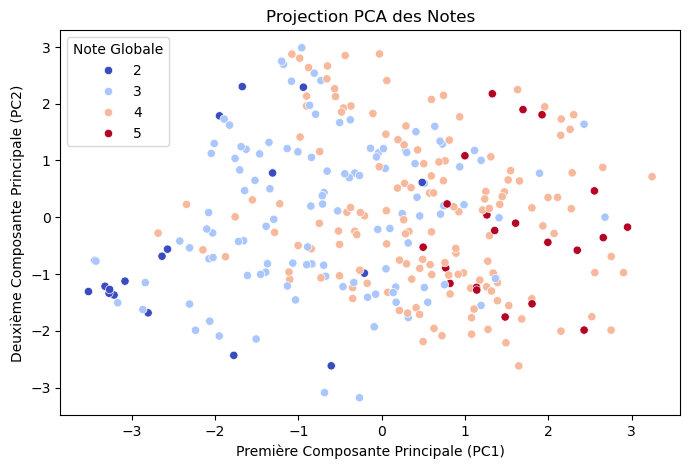

In [30]:
from sklearn.decomposition import PCA

# Application de PCA
pca = PCA(n_components=2)  # Réduction à 2 dimensions pour la visualisation
X_pca = pca.fit_transform(X_scaled)

# Création d'un DataFrame pour la visualisation
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Note Globale'] = y

# Variance expliquée par chaque composante
explained_variance = pca.explained_variance_ratio_
print(f"📊 Variance expliquée par PC1: {explained_variance[0]*100:.2f}%")
print(f"📊 Variance expliquée par PC2: {explained_variance[1]*100:.2f}%")

# Visualisation en 2D avec les notes
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df_pca['Note Globale'], palette='coolwarm')
plt.xlabel("Première Composante Principale (PC1)")
plt.ylabel("Deuxième Composante Principale (PC2)")
plt.title("Projection PCA des Notes")
plt.legend(title="Note Globale")
plt.show()


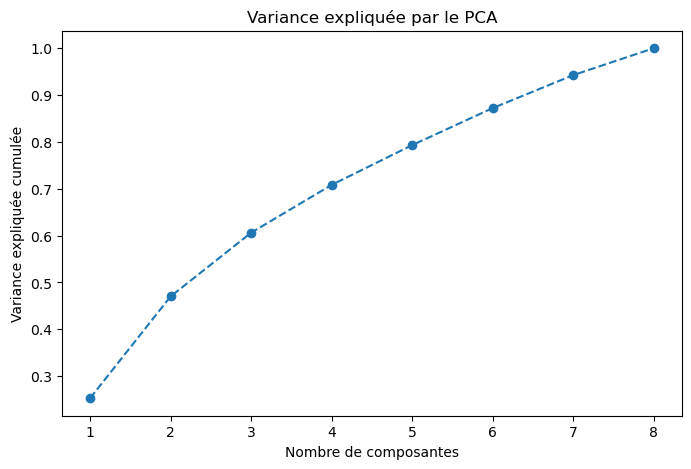

In [20]:
pca_full = PCA()
pca_full.fit(X_scaled)

# Graphique de la variance expliquée
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca_full.explained_variance_ratio_)+1), 
         np.cumsum(pca_full.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée cumulée')
plt.title('Variance expliquée par le PCA')
plt.show()


In [21]:
components = pd.DataFrame(pca.components_, columns=X.columns, index=[f"PC{i}" for i in range(1, pca.n_components_+1)])
print(components.loc[['PC1', 'PC2']])


     Nombre de Mots  Mots-Clés Positifs  Mots-Clés Négatifs  Type de Séjour  \
PC1        0.425821            0.345898           -0.425009        0.501490   
PC2       -0.326017            0.270725           -0.218774       -0.207203   

     Durée Séjour (nuits)  Mode de Réservation  Nationalité  Fréquence Séjours  
PC1              0.467820            -0.038717     0.156036           0.149012  
PC2             -0.252419             0.028962     0.539765           0.611331  


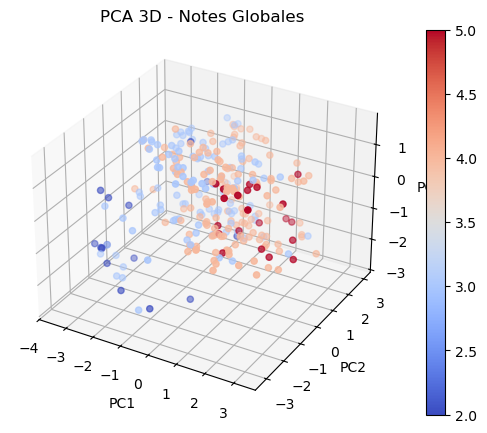

In [22]:
from mpl_toolkits.mplot3d import Axes3D

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y, cmap='coolwarm')
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.title("PCA 3D - Notes Globales")
plt.colorbar(scatter)
plt.show()


📊 Variance expliquée par PC1: 28.89%
📊 Variance expliquée par PC2: 24.82%
📌 Coefficients des variables pour PC1 et PC2:
      Nombre de Mots  Mots-Clés Positifs  Mots-Clés Négatifs  Type de Séjour  \
PC1        0.424404            0.350915           -0.425136        0.500017   
PC2       -0.327026            0.265530           -0.217903       -0.208015   

     Durée Séjour (nuits)  Nationalité  Fréquence Séjours  
PC1              0.468089     0.155183           0.150975  
PC2             -0.254932     0.541806           0.610943  


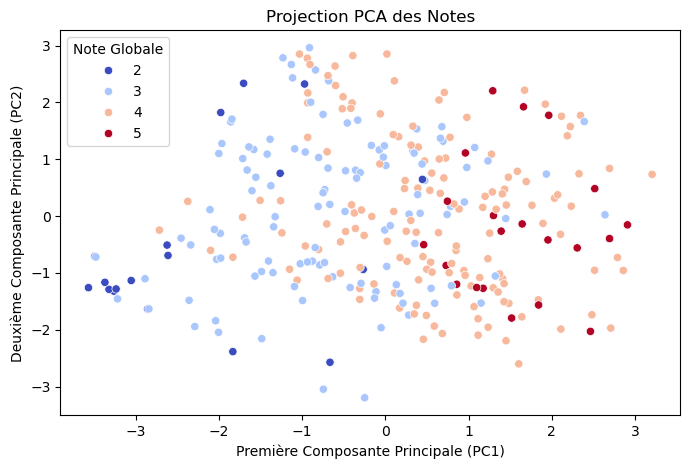

In [26]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir X_scaled en DataFrame
X_reduced = pd.DataFrame(X_scaled, columns=X.columns)  

# Vérification et suppression de "Mode de Réservation" si présent
if 'Mode de Réservation' in X_reduced.columns:
    X_reduced = X_reduced.drop(columns=['Mode de Réservation'])

# Application du PCA avec 2 composantes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_reduced)

# Création d'un DataFrame pour la visualisation
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Note Globale'] = y

# Variance expliquée par chaque composante
explained_variance = pca.explained_variance_ratio_
print(f"📊 Variance expliquée par PC1: {explained_variance[0]*100:.2f}%")
print(f"📊 Variance expliquée par PC2: {explained_variance[1]*100:.2f}%")

# Affichage des coefficients des variables pour PC1 et PC2
pca_components = pd.DataFrame(pca.components_, columns=X_reduced.columns, index=['PC1', 'PC2'])
print("📌 Coefficients des variables pour PC1 et PC2:\n", pca_components)

# Visualisation en 2D avec les notes
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df_pca['Note Globale'], palette='coolwarm')
plt.xlabel("Première Composante Principale (PC1)")
plt.ylabel("Deuxième Composante Principale (PC2)")
plt.title("Projection PCA des Notes")
plt.legend(title="Note Globale")
plt.show()



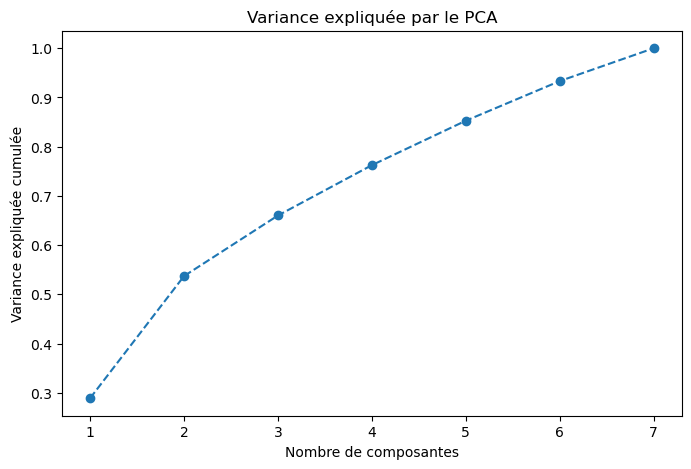

In [28]:
pca_full = PCA()
pca_full.fit(X_reduced)

# Graphique de la variance expliquée
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca_full.explained_variance_ratio_)+1), 
         np.cumsum(pca_full.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée cumulée')
plt.title('Variance expliquée par le PCA')
plt.show()


📊 Variance expliquée par PC1: 28.89%
📊 Variance expliquée par PC2: 24.82%
📊 Variance expliquée par PC3: 12.31%
📊 Variance expliquée par PC4: 10.23%
📊 Variance expliquée par PC5: 9.03%
📊 Variance expliquée par PC6: 8.05%
📊 Variance expliquée par PC7: 6.67%
📌 Coefficients des variables pour PC1 et PC2:
      Nombre de Mots  Mots-Clés Positifs  Mots-Clés Négatifs  Type de Séjour  \
PC1        0.424404            0.350915           -0.425136        0.500017   
PC2       -0.327026            0.265530           -0.217903       -0.208015   
PC3       -0.088414            0.641965           -0.385233       -0.286434   
PC4       -0.192491            0.573501            0.671947       -0.045969   
PC5        0.780779            0.187372            0.300525       -0.170512   
PC6       -0.205142            0.126975            0.241851        0.729792   
PC7        0.127927           -0.118739            0.151834       -0.246747   

     Durée Séjour (nuits)  Nationalité  Fréquence Séjours  
PC1 

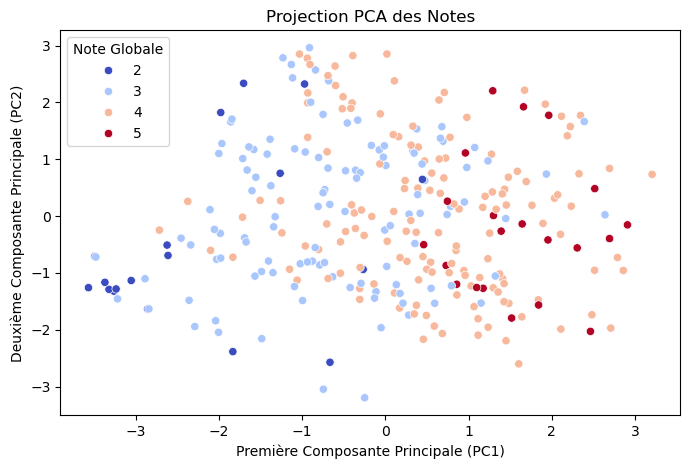

In [32]:
# Convertir X_scaled en DataFrame
X_reduced = pd.DataFrame(X_scaled, columns=X.columns)  

# Vérification et suppression de "Mode de Réservation" si présent
if 'Mode de Réservation' in X_reduced.columns:
    X_reduced = X_reduced.drop(columns=['Mode de Réservation'])

# Application du PCA avec 2 composantes principales
pca = PCA(n_components=7)
X_pca = pca.fit_transform(X_reduced)

# Création d'un DataFrame pour la visualisation
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7'])
df_pca['Note Globale'] = y

# Variance expliquée par chaque composante
explained_variance = pca.explained_variance_ratio_
print(f"📊 Variance expliquée par PC1: {explained_variance[0]*100:.2f}%")
print(f"📊 Variance expliquée par PC2: {explained_variance[1]*100:.2f}%")
print(f"📊 Variance expliquée par PC3: {explained_variance[2]*100:.2f}%")
print(f"📊 Variance expliquée par PC4: {explained_variance[3]*100:.2f}%")
print(f"📊 Variance expliquée par PC5: {explained_variance[4]*100:.2f}%")
print(f"📊 Variance expliquée par PC6: {explained_variance[5]*100:.2f}%")
print(f"📊 Variance expliquée par PC7: {explained_variance[6]*100:.2f}%")


# Affichage des coefficients des variables pour PC1 et PC2
pca_components = pd.DataFrame(pca.components_, columns=X_reduced.columns, index=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7'])
print("📌 Coefficients des variables pour PC1 et PC2:\n", pca_components)

# Visualisation en 2D avec les notes
plt.figure(figsize=(8,5))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df_pca['Note Globale'], palette='coolwarm')
plt.xlabel("Première Composante Principale (PC1)")
plt.ylabel("Deuxième Composante Principale (PC2)")
plt.title("Projection PCA des Notes")
plt.legend(title="Note Globale")
plt.show()
